## Location or Size: What Influences House Prices in Mexico?

There is an assumptions that the location of the house influenced house prices than size let's check that.

## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

##load Dataset


In [ ]:
df = pd.read_csv("/content/mexico-real-estate-clean.csv",encoding='latin-1',index_col=0)


In [ ]:
df.head()

,state,lat,lon,area_m2,price_usd
property_type,,,,,
house,Estado de MÃ©xico,19.560181,-99.233528,150,67965.56
house,Nuevo LeÃ³n,25.688436,-100.198807,186,63223.78
apartment,Guerrero,16.767704,-99.764383,82,84298.37
apartment,Guerrero,16.829782,-99.911012,150,94308.80
house,YucatÃ¡n,21.052583,-89.538639,205,105191.37


##Which state has the most expensive real estate market?

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? 
Now, we need to break that calculation down by state and visualize the results.

In [ ]:
#divide our dataset into groups (one per state) and calculate the mean house price for each group.
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
QuerÃ©taro                         133955.913281
Guanajuato                         133277.965833
Nuevo LeÃ³n                        129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de MÃ©xico                  122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
YucatÃ¡n                           108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

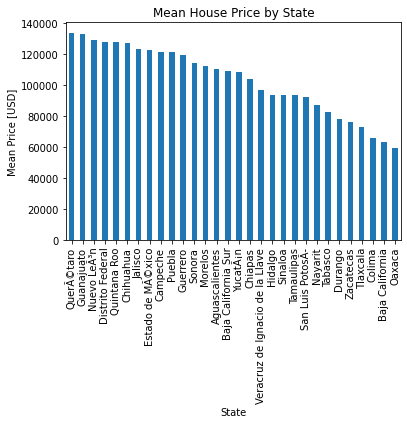

In [ ]:
#create a bar chart to show the results
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title = "Mean House Price by State");

It seems weird that Querétaro is  Mexico's most expensive real estate market because according to recent GDP numbers, it's not in the top 10 state economies. 
Since house sizes vary across states, a better metric would be the price per m2.In order to do that, we need to create a new column.


In [ ]:
df["price_per_m2"] = df["price_usd"]/df["area_m2"]
df.head()

,state,lat,lon,area_m2,price_usd,price_per_m2
property_type,,,,,,
house,Estado de MÃ©xico,19.560181,-99.233528,150,67965.56,453.103733
house,Nuevo LeÃ³n,25.688436,-100.198807,186,63223.78,339.912796
apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
house,YucatÃ¡n,21.052583,-89.538639,205,105191.37,513.128634


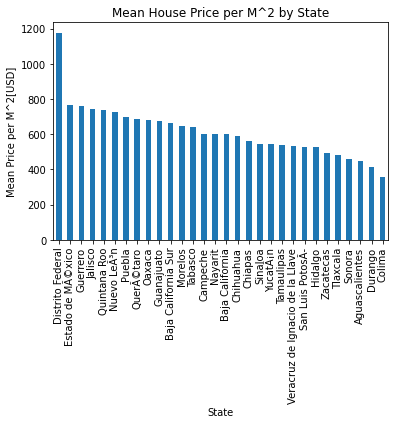

In [ ]:
(
    df
    .groupby("state") 
    ["price_per_m2"].mean() #use the groupby method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m2 for that state.
    .sort_values(ascending= False) #Make sure the states are sorted from the highest to lowest mean
    #use the Series to create a bar chart of your results. 
    .plot(
     kind ="bar",
     xlabel="State",
     ylabel="Mean Price per M^2[USD]",
     title="Mean House Price per M^2 by State")
);

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets.

##Is there a relationship between home size and price?

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

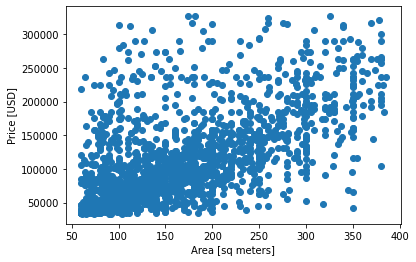

In [ ]:
plt.scatter(data=df,x="area_m2",y="price_usd")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]");

From the above scatter plot , we can see that there's a positive correlation between the size and the price of the house — in other words, the bigger the house, the higher the price. But how can we quantify this correlation?

In [ ]:
#Let's calculate the pearson correlation Coefficient
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.585518245323206


there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [ ]:
#Create a new dataframe contains only the rows that have Morelos value in state column
df_morelos = df[df['state']=='Morelos']
df_morelos.shape

(160, 6)

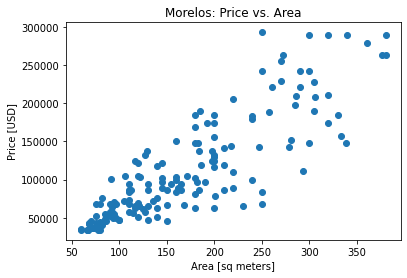

In [ ]:
#shows price vs area in Morelos state
plt.scatter(data=df_morelos,x="area_m2",y="price_usd")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs. Area");

The correlation is more stronger within Morelos. 

In [ ]:
#calculate the correlation coefficient and verify that that's the case.
p_correlation = df_morelos['area_m2'].corr(df_morelos['price_usd'])
print(p_correlation)

0.8498077608713708


There's a strong relationship between house size and price in Morelos.
Let's look at another state 

Correlation Coefficient :  0.41070392130717864  



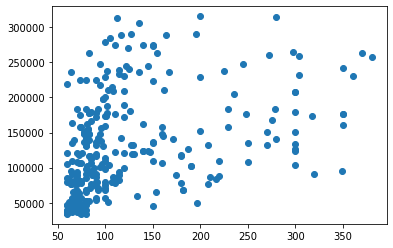

In [ ]:
# Subset `df` to include only observations from `"Distrito Federal"`
df_mexico_city = df[df['state']=='Distrito Federal']

# Create a scatter plot price vs area
plt.scatter(data=df_mexico_city,x="area_m2",y="price_usd")

p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print("Correlation Coefficient : ",p_correlation ," \n")

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price.

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price.